## Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset

file_path= '/Users/mdmuhtashimlekhon/Desktop/Python Projects/heart_failure.csv'
df= pd.read_csv(file_path)
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


## EDA

In [3]:
# Replace commas within the file with the correct delimiter and then load it

import re
with open(file_path, 'r') as file:
    lines= file.readlines()

In [4]:
# Correct the lines by removing quotes and replacing commas with the correct delimiter

corrected_lines= [re.sub(r'[\"]', '', line) for line in lines]
corrected_file_path= '/Users/mdmuhtashimlekhon/Desktop/Python Projects/heart_failure.csv'
with open(corrected_file_path, 'w') as file:
    file.writelines(corrected_lines)

In [5]:
# Load the corrected file

df= pd.read_csv(corrected_file_path)
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
# Check for missing values

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

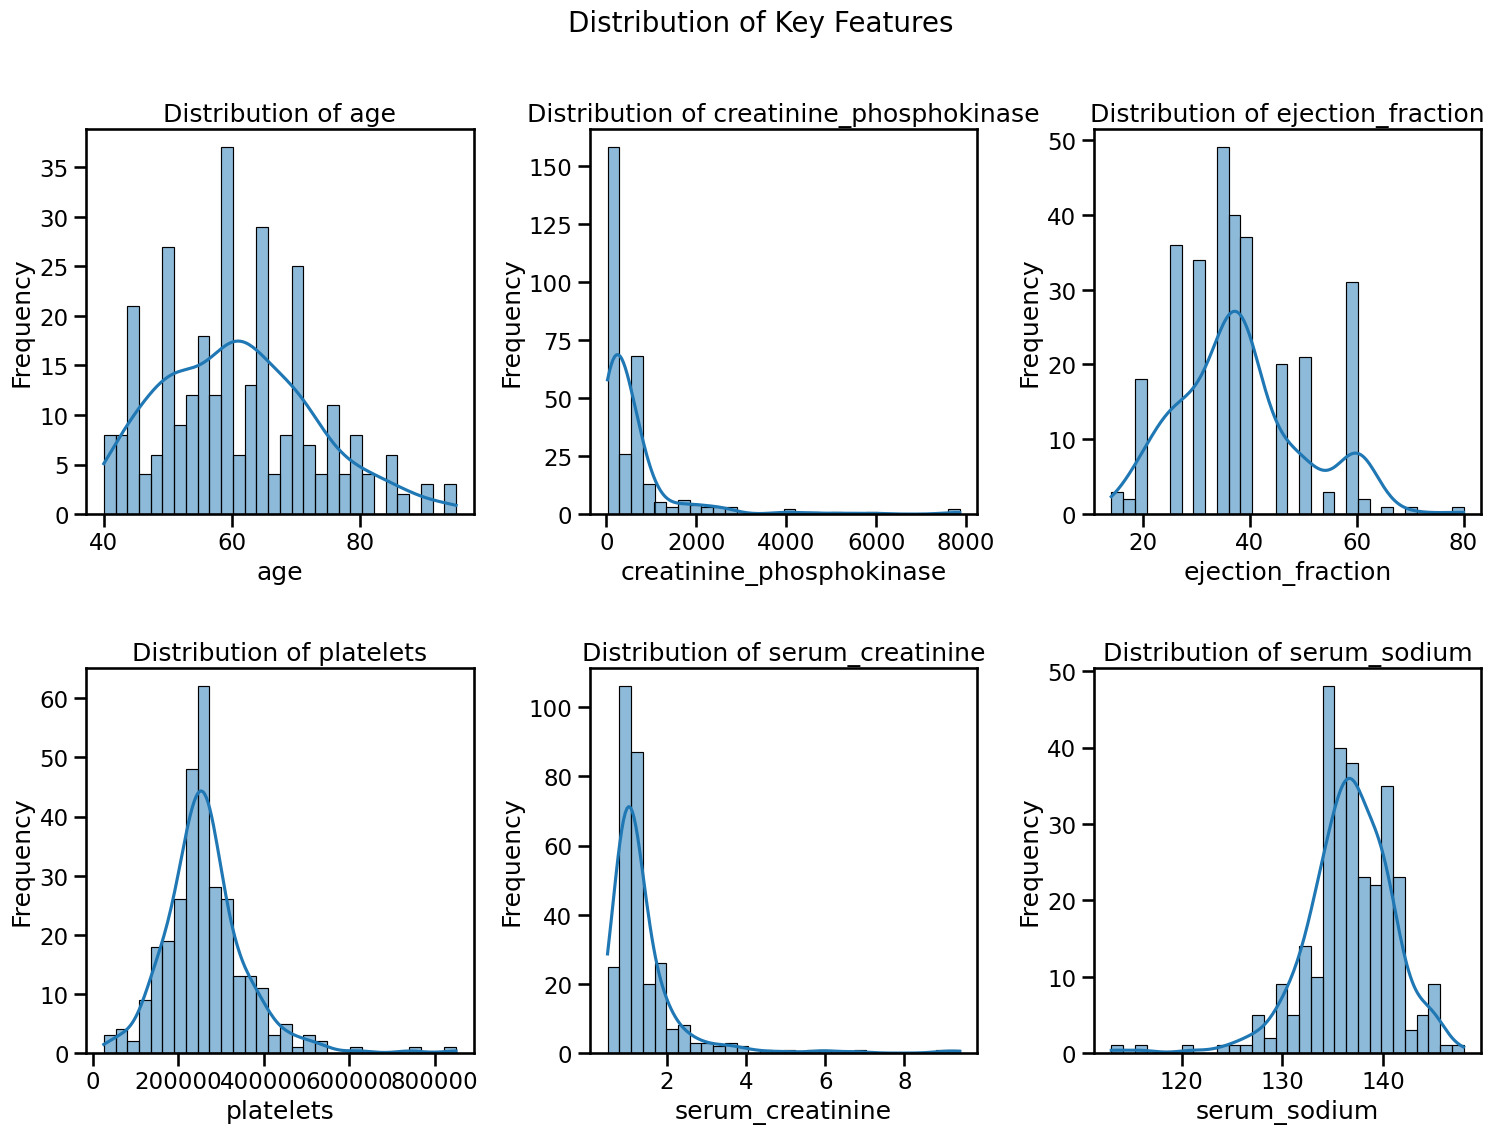

In [10]:
# Set the style of the visualization

sns.set_context("talk")

# Features to plot

features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Adjust the space between plots

plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Main title for the entire figure

plt.suptitle('Distribution of Key Features', fontsize=20)

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.show()

In [11]:
# Correlation Matrix

corr_matrix= df.corr()

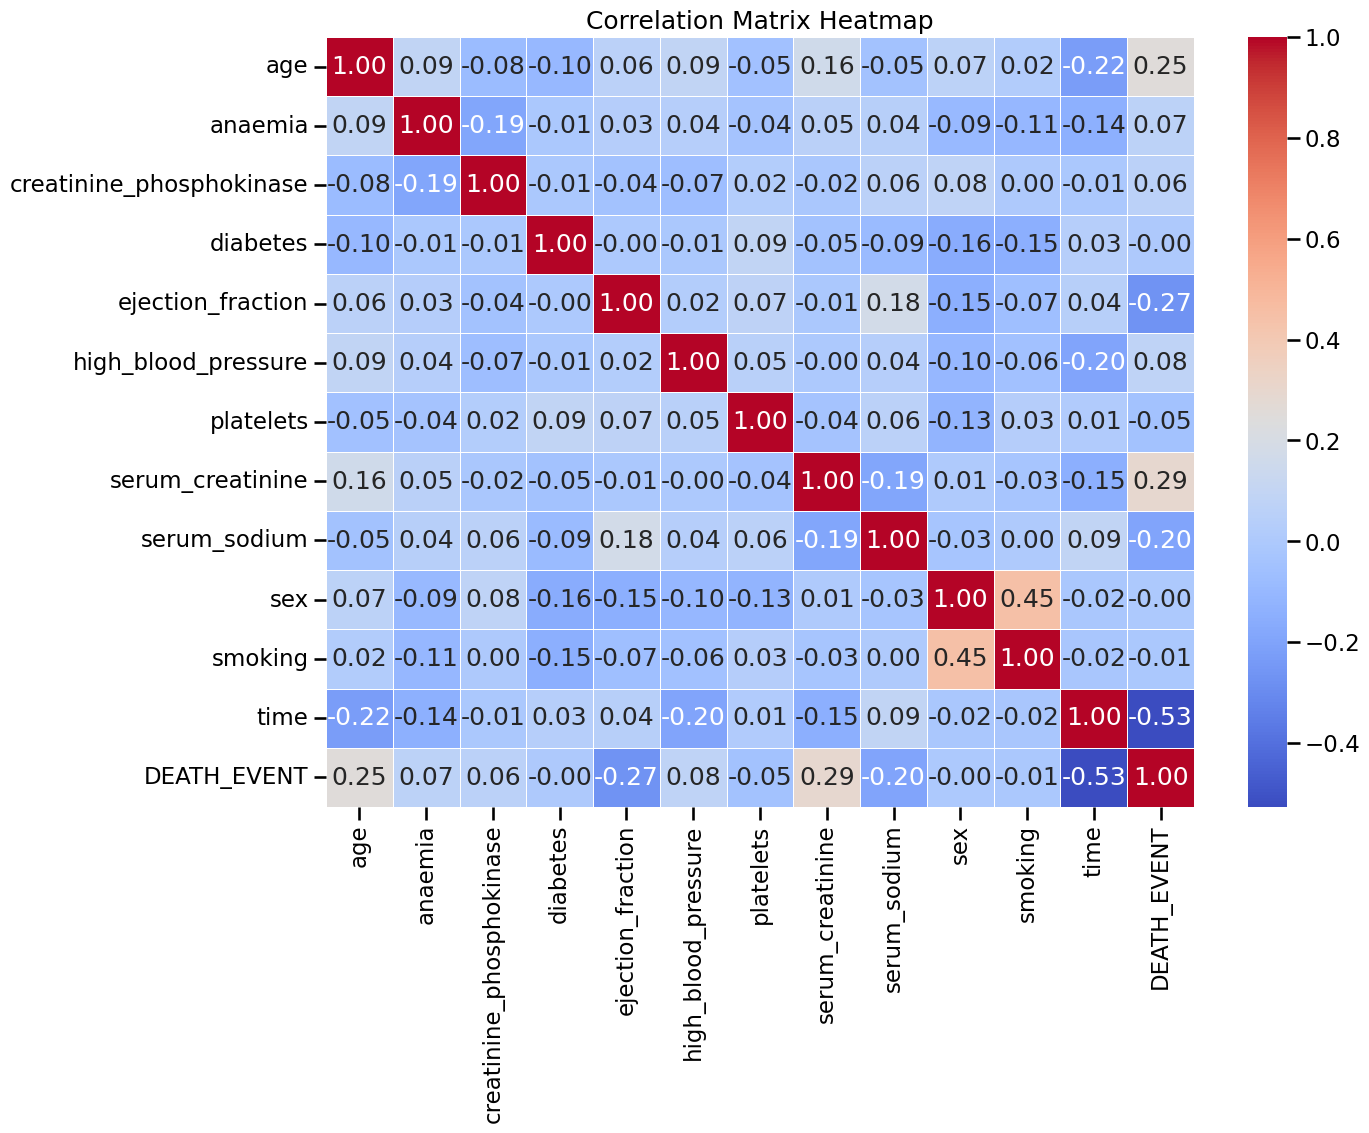

In [12]:
# Heatmap

plt.figure(figsize= (14,10))
sns.heatmap(corr_matrix, annot= True, fmt= '.2f', cmap= 'coolwarm', linewidths= 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

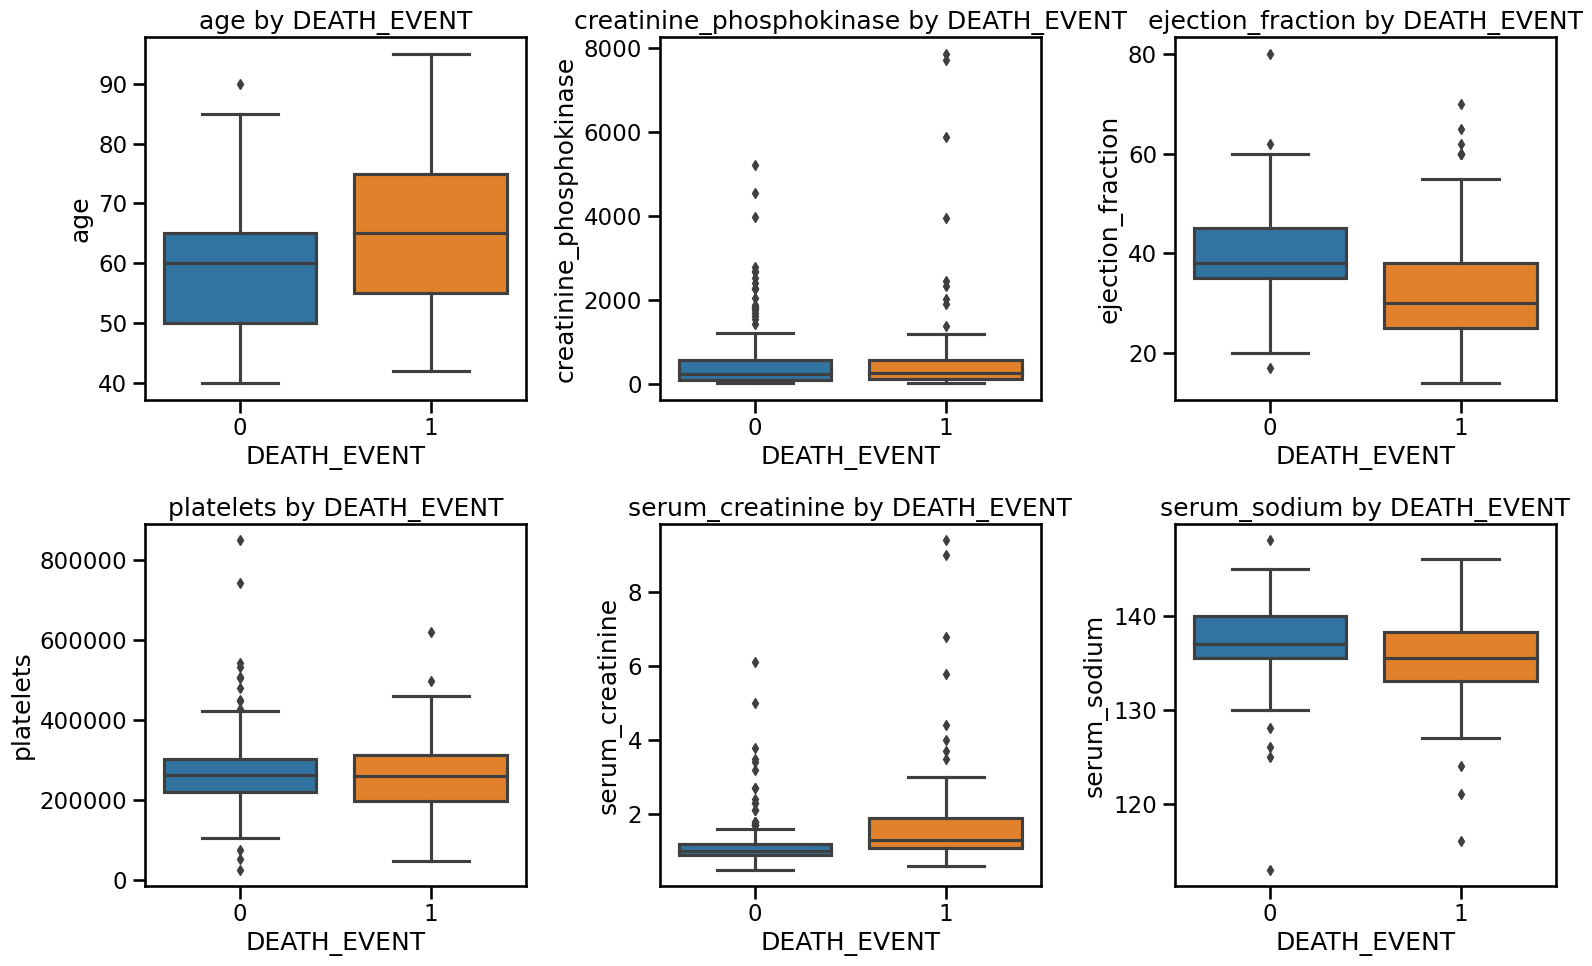

In [13]:
# Boxplots based on DEATH_EVENT

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x= 'DEATH_EVENT', y= feature, data= df)
    plt.title(f'{feature} by DEATH_EVENT')

plt.tight_layout()
plt.show()

## Machine Learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, auc

In [15]:
# Define features and target

X= df.drop ('DEATH_EVENT', axis= 1)
y= df['DEATH_EVENT']

In [16]:
# Split the data

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [17]:
# Standardize the features

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [18]:
# Define classifiers

classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

metrics = {
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": []
}

confusion_matrices = {}

In [19]:
# Evaluate classifiers

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    metrics["Accuracy"].append(accuracy)
    metrics["Sensitivity"].append(sensitivity)
    metrics["Specificity"].append(specificity)
    
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

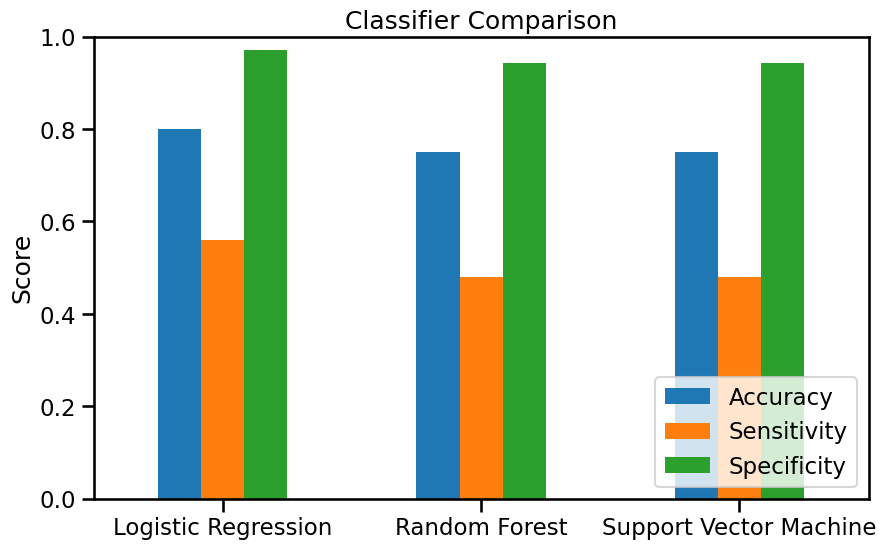

In [20]:
# Plot the grouped bar chart

metrics_df= pd.DataFrame(metrics, index= classifiers.keys())

metrics_df.plot(kind= 'bar', figsize= (10, 6))
plt.title('Classifier Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation= 0)
plt.legend(loc= 'lower right')
plt.show()

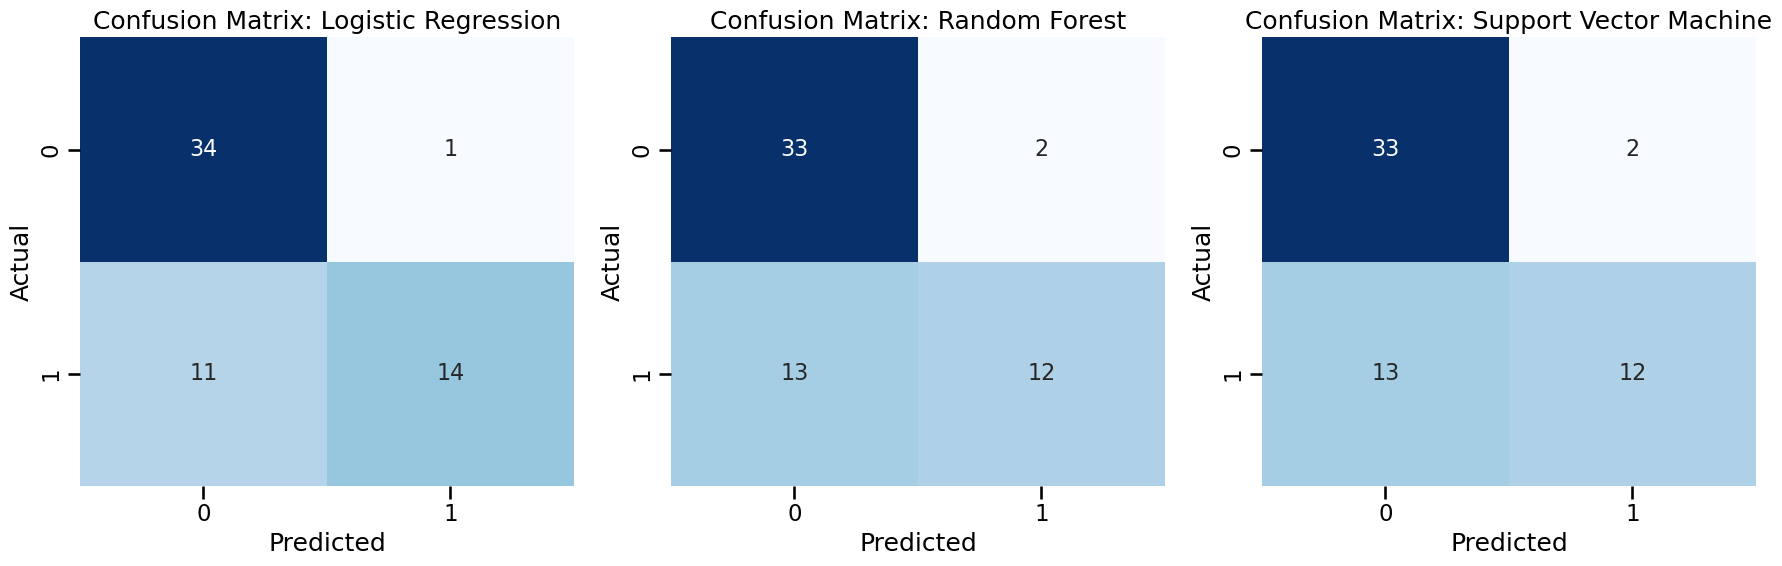

In [21]:
# Plot confusion matrices as heatmaps

plt.figure(figsize= (18, 6))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', cbar= False, annot_kws= {'size': 16})
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()   

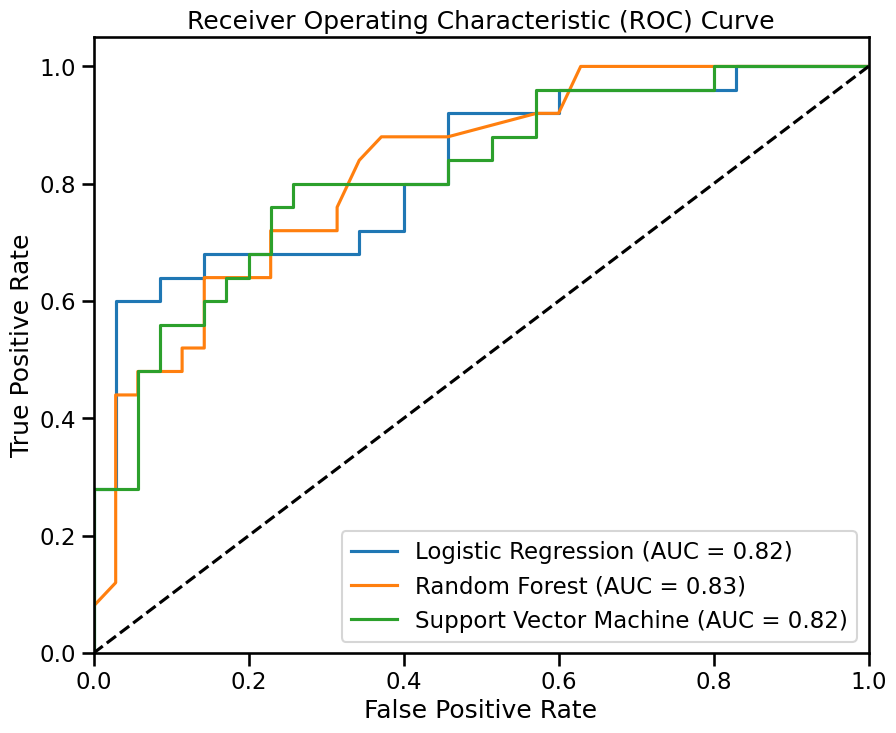

In [22]:
# Plot ROC curves

plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()